# Compare Performances of Various Regression Models

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

To predict an individual's income level (label 'IncomeGroup'), in this project, I will:

1. Load the "cell2celltrain" data set.
2. Train and evaluate a linear regression model. 
2. Perform a grid search to identify and fit a cross-validated optimal decision tree regressor. 
3. Fit the optimal decision tree regressor to the training data and make predictions on the test data.
4. Train and evaluate an optimized gradient boosted decision tree and an optimized random forest.
5. Visualize all of the models' performances.

## Part 1: Load the Data Set

I will work with the "cell2celltrain" data set found on Kaggle. This data set is already preprocessed, with the proper formatting, outliers and missing values taken care of, and all numerical columns scaled to the [0, 1] interval. One-hot encoding has been performed.

In [2]:

filename = os.path.join(os.getcwd(), "data", "cell2celltrain.csv")

In [3]:
df = pd.read_csv(filename)

In [4]:
df.head()

,CustomerID,Churn,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,HomeownershipKnown,BuysViaMailOrder,RespondsToMailOffers,...,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,Married_False,Married_True,Married_nan
0,3000002,True,False,False,True,False,False,True,True,True,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3000010,True,True,False,False,False,False,True,True,True,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3000014,False,True,False,False,False,False,False,False,False,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3000022,False,False,False,True,False,False,True,True,True,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3000026,True,False,False,False,False,False,True,True,True,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Part 2: Create Training and Test Data Sets

### Create Labeled Examples  

In [10]:
y=df["IncomeGroup"]
X=df.drop(columns=["IncomeGroup"], axis=1)

### Split Labeled Examples Into Training and Test Sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1234)

## Part 3: Fit and Evaluate Two Regression Models: Linear Regression and Decision Tree

### a. Fit and Evaluate a Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# Make predictions on the test data
y_lr_pred=lr_model.predict(X_test)

To evaluate the linear regression model, I will compute the RMSE (root mean square error) on the test set. RMSE is a metric used to evaluate regression models that finds the differences between the predicted values and the actual values.

In [15]:
lr_rmse = mean_squared_error(y_test, y_lr_pred, squared=False)
lr_r2 = r2_score(y_test,y_lr_pred)

print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))

[LR] Root Mean Squared Error: 0.6105375738796515
[LR] R2: 0.6270447801087499


### b. Fit and Evaluate a Decision Tree Using GridSearch

In [16]:
from sklearn.tree import DecisionTreeRegressor

#### Set Up a Parameter Grid to Determine the Maximum Depth of the Tree and the Minimum Number of Leaves (End Nodes)

In [17]:
param_grid = {
    'max_depth': [4, 8],
    'min_samples_leaf': [25, 50]
}

In [18]:
print('Running Grid Search...')

dt_regressor = DecisionTreeRegressor()


# Run a Grid Search with 3-fold cross-validation and specify the scoring method as negative RMSE

dt_grid = GridSearchCV(dt_regressor,param_grid, cv=3, scoring='neg_root_mean_squared_error')


# Fit the model (use the 'grid' variable) on the training data and assign the fitted model to the 
#    variable 'dt_grid_search'

dt_grid_search = dt_grid.fit(X_train, y_train)


print('Done')


Running Grid Search...
Done


In [19]:
rmse_DT = -1 * dt_grid_search.best_score_
print("[DT] RMSE for the best model is : {:.2f}".format(rmse_DT) )

[DT] RMSE for the best model is : 0.59


Finding the best set of parameter values:

In [22]:
dt_best_params = dt_grid_search.best_params_
dt_best_params

{'max_depth': 8, 'min_samples_leaf': 50}

Fit the model to the best parameter value:

In [23]:
dt_model=DecisionTreeRegressor(max_depth=8, min_samples_leaf=50)

dt_model.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=50, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [25]:
y_dt_pred = dt_model.predict(X_test)


dt_rmse = mean_squared_error(y_test, y_dt_pred, squared=False)

dt_r2 = r2_score(y_test,y_dt_pred)


print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse))
print('[DT] R2: {0}'.format(dt_r2))

[DT] Root Mean Squared Error: 0.5830066657599573
[DT] R2: 0.6599216872414844


## Part 4: Fit and Evaluate Two Regression Ensemble Models

### a. Fit and Evaluate a Gradient Boosted Decision Tree 

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

In [27]:
print('Begin GBDT Implementation...')

gbdt_model = GradientBoostingRegressor(max_depth=3,n_estimators = 300)
# Hyperparameters were chosen arbitrarily to save computational time

gbdt_model.fit(X_train, y_train)
print('End')

Begin GBDT Implementation...
End


In [28]:

y_gbdt_pred = gbdt_model.predict(X_test)

gbdt_rmse = mean_squared_error(y_test, y_gbdt_pred, squared=False)

gbdt_r2 = r2_score(y_test,y_gbdt_pred)
           

print('[GBDT] Root Mean Squared Error: {0}'.format(gbdt_rmse))
print('[GBDT] R2: {0}'.format(gbdt_r2))                 

[GBDT] Root Mean Squared Error: 0.5586558092901441
[GBDT] R2: 0.6877369946621541


### b. Fit and Evaluate a Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
print('Begin RF Implementation...')

rf_model = RandomForestRegressor(max_depth=32,n_estimators = 300)
# Hyperparameters were chosen arbitrarily to save computational time

rf_model.fit(X_train, y_train)

print('End')

Begin RF Implementation...
End


In [31]:
# 1. Use predict() to test use the fitted model to make predictions on the test data
y_rf_pred = rf_model.predict(X_test)
# 2. Compute the RMSE using mean_squared_error() 

rf_rmse = mean_squared_error(y_test, y_rf_pred, squared=False)
# 3. Compute the R2 score using r2_score()
rf_r2 = r2_score(y_test,y_rf_pred)

                   
print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))    
                   

[RF] Root Mean Squared Error: 0.561827098120196
[RF] R2: 0.6841817218596373


## Part 5: Visualize Model Performance

The code cell below plots the RMSE and R2 score for each regressor.

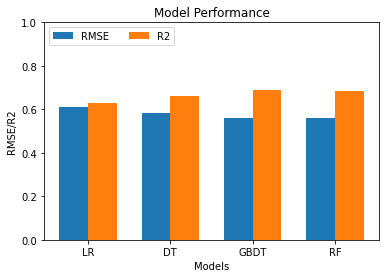

In [32]:
RMSE_Results = [lr_rmse, dt_rmse, gbdt_rmse, rf_rmse]
R2_Results = [lr_r2, dt_r2, gbdt_r2, rf_r2]
labels = ['LR', 'DT', 'GBDT', 'RF']

rg= np.arange(4)
width = 0.35
plt.bar(rg, RMSE_Results, width, label="RMSE")
plt.bar(rg+width, R2_Results, width, label='R2')
plt.xticks(rg + width/2, labels)
plt.xlabel("Models")
plt.ylabel("RMSE/R2")
plt.ylim([0,1])

plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()


#### Analysis

The RMSE values remained relatively consistent across all four models, which means that on average, all four models make the same amount of error in their predictions. However the R2 values showed a more noticeable increase specifically for the GBDT and RF models, the only two ensemble models in the comparison, suggesting that these two model can explain a greater amount of variance in the dependent variables. A higher R2 signifies a stronger correlation between features and predictions, which also signifies reduced variance. This means that ensemble models, in this case GBDT and RF, have effectively increased the predictability of our model through reducing variance using ensemble methods, even if the RMSE values didn't show any improvement.